This notebook is in the series of my self coding skills development regarding numerical methods. This covers:

- Taylor expansion: give a approximation of the function
- How to generate perturbed data
- Spline interpolation
- Fitting a model with polynominal function (best fit through every point of dataset)
- Gradient Descent algorithm (model function, error, gradient of error, update weight)

# Interpolation of data
- Thien Dong Nhat

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [ ]:
def expTaylor(x, x0, nmax):
  # x: argument
  # X0: argument at which derivatives will be calculated
  # n_max: the upper boundary
  t = 0
  for n in range(nmax+1):
    t = t + np.exp(x0) * (x - x0)**n / np.math.factorial(n)

  return t 

In [ ]:
expTaylor(1,0,10)

2.7182818011463845

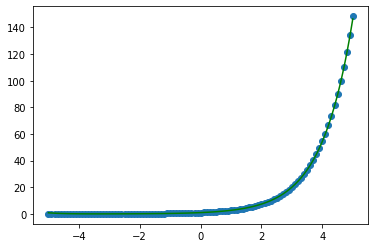

In [ ]:
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))

plt.plot(x_list, expTaylor(x_list, 0, 10), "green")
plt.show()

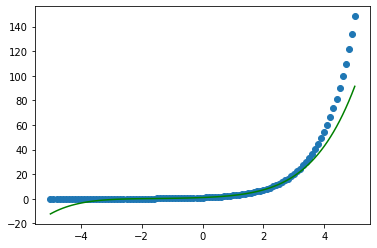

In [ ]:
# We lower the number of items on apansion series
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))

plt.plot(x_list, expTaylor(x_list, 0, 5), "green")
plt.show()

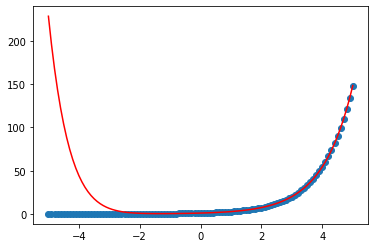

In [ ]:
# We change the X0 value
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))
plt.plot(x_list, expTaylor(x_list, 2, 10), "red")
plt.show()

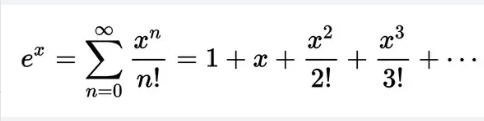

In [ ]:
def expTaylor_all(x, n_max):

  t = 0
  for n in range(n_max+1):
    t = t + x**n / np.math.factorial(n)

  return t

In [ ]:
expTaylor_all(1,10)

2.7182818011463845

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [ ]:
n = np.arange(101)

from scipy.special import factorial

factorial(2*n+1)

array([1.00000000e+000, 6.00000000e+000, 1.20000000e+002, 5.04000000e+003,
       3.62880000e+005, 3.99168000e+007, 6.22702080e+009, 1.30767437e+012,
       3.55687428e+014, 1.21645100e+017, 5.10909422e+019, 2.58520167e+022,
       1.55112100e+025, 1.08888695e+028, 8.84176199e+030, 8.22283865e+033,
       8.68331762e+036, 1.03331480e+040, 1.37637531e+043, 2.03978821e+046,
       3.34525266e+049, 6.04152631e+052, 1.19622221e+056, 2.58623242e+059,
       6.08281864e+062, 1.55111875e+066, 4.27488328e+069, 1.26964034e+073,
       4.05269195e+076, 1.38683119e+080, 5.07580214e+083, 1.98260832e+087,
       8.24765059e+090, 3.64711109e+094, 1.71122452e+098, 8.50478589e+101,
       4.47011546e+105, 2.48091408e+109, 1.45183092e+113, 8.94618213e+116,
       5.79712602e+120, 3.94552397e+124, 2.81710411e+128, 2.10775730e+132,
       1.65079552e+136, 1.35200153e+140, 1.15677251e+144, 1.03299785e+148,
       9.61927597e+151, 9.33262154e+155, 9.42594776e+159, 9.90290072e+163,
       1.08139676e+168, 1

In [ ]:
def sinTaylor(x, nmax):
  n = np.arange(nmax+1)
  total = np.sum((-1)**n * x**(2*n+1) / factorial(2*n+1))
  return total

In [ ]:
def sinTaylor_loop(x, nmax):
  t = 0
  for n in range(nmax+1):
    t = t + (-1)**n * x**(2*n+1) / np.math.factorial(2*n+1)
  return t

In [ ]:
sinTaylor(10.5, 20)

-0.8796957586942402

In [ ]:
sinTaylor_loop(10.5, 20)

-0.8796957586938972

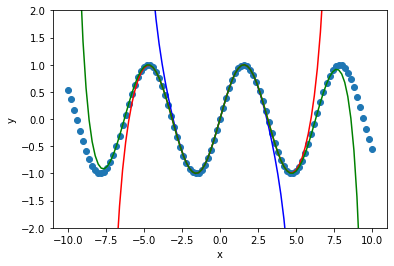

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-2,2])

x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor_loop(x_list, 3), "blue")
plt.plot(x_list, sinTaylor_loop(x_list, 6), "red")
plt.plot(x_list, sinTaylor_loop(x_list, 9), "green")

- Accuracy of \\( \sin(10.5) \\)

In [ ]:
sinTaylor(10.5, 15)

-0.88022267274755

In [ ]:
sinTaylor_loop(10.5, 15)

-0.8802226727472069

### 1.3 Implementation of a general function

Derivative (more details in separate section): \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [ ]:
def derivative(f, x, h):
  # f: function
  # x: argument
  # h: step size

  return (f(x+h) - f(x)) / h

In [ ]:
def func(x):
  return 2*np.sin(x)**2 + x

In [ ]:
x0 = 1
derivative(f=func, x=x0, h=0.1)

2.723542807082042

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [ ]:
def n_derivative(f, x, h, n):
  # f: function
  # x: argument
  # h: step size
  # n: order of derivative
  t = 0
  for k in range(n+1):
    t = t + (1/h**n)*(-1**(k+n))*np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))*f(x+k*h)

  return t

In [ ]:
n_derivative(f=func, x=x0, h=0.01, n=10)

-2.6159039902082494e+23

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function


Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [ ]:
#### Tayylor Expansion general form
def n_derivative(f, x, h, n):
  # f: function
  # x: argument
  # h: step size
  # n: order of derivative
  t = 0
  for k in range(n+1):
    t = t + ((-1)**(k+n))*np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))*f(x+k*h)

  return t / h**n


def Taylor(f, x, x0, nmax, h):
  # f: function
  # x: argument
  # x0: intitial point
  # h: step size
  # n: order of derivative
  
  # We will program the taylor expansion with the defined n_derivative function
  t = 0
  for n in range(nmax + 1):
    t = t + 1/np.math.factorial(n) * n_derivative(f, x0, h, n) * (x-x0)**n

  return t

In [ ]:
sinTaylor(10.5, 15)

-0.88022267274755

In [ ]:
def func(x):
  return 2*np.sin(x)**2 + x

n_derivative(func, 10.5, 0.1, 2)

-2.802754599797907

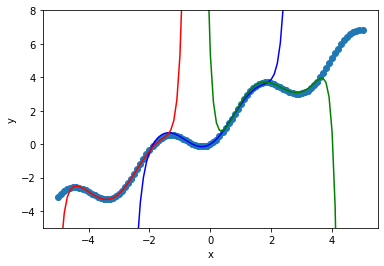

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-5,8])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

plt.plot(x_list, Taylor(func, x_list, x0=0, nmax=15, h=0.05), "blue")
plt.plot(x_list, Taylor(func, x_list, x0=2, nmax=15, h=0.05), "green")
plt.plot(x_list, Taylor(func, x_list, x0=-3, nmax=15, h=0.05), "red")

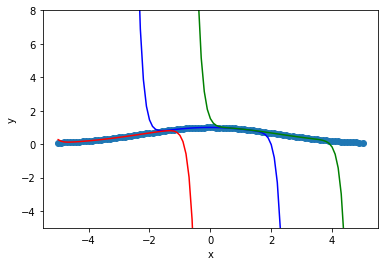

In [ ]:
def func(x):
  return np.exp(-0.1*x**2)

plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-5,8])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

plt.plot(x_list, Taylor(func, x_list, x0=0, nmax=15, h=0.05), "blue")
plt.plot(x_list, Taylor(func, x_list, x0=2, nmax=15, h=0.05), "green")
plt.plot(x_list, Taylor(func, x_list, x0=-3, nmax=15, h=0.05), "red")

## 2. Interpolation

### 2.1 Generate data points

In [ ]:
def correctFunction(x):
  return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

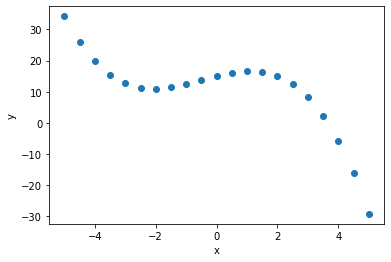

In [ ]:
npoints = 21
xlist = np.linspace(-5,5,npoints)
data0 = np.array([xlist, correctFunction(xlist)])

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])

In [ ]:
data0.T

array([[ -5.     ,  34.25   ],
       [ -4.5    ,  25.96875],
       [ -4.     ,  19.8    ],
       [ -3.5    ,  15.48125],
       [ -3.     ,  12.75   ],
       [ -2.5    ,  11.34375],
       [ -2.     ,  11.     ],
       [ -1.5    ,  11.45625],
       [ -1.     ,  12.45   ],
       [ -0.5    ,  13.71875],
       [  0.     ,  15.     ],
       [  0.5    ,  16.03125],
       [  1.     ,  16.55   ],
       [  1.5    ,  16.29375],
       [  2.     ,  15.     ],
       [  2.5    ,  12.40625],
       [  3.     ,   8.25   ],
       [  3.5    ,   2.26875],
       [  4.     ,  -5.8    ],
       [  4.5    , -16.21875],
       [  5.     , -29.25   ]])

Modify x and y values by adding random numbers

In [ ]:
# Random from -1 to 1
2*np.random.rand(npoints) -1 

# Random from -0.1 to 0.1
(2*np.random.rand(npoints) -1) * 0.1

array([ 0.08625119, -0.04451675, -0.04136045,  0.03542798,  0.0971354 ,
       -0.09493483, -0.08333855,  0.03845131, -0.09669524, -0.00795626,
        0.03346877, -0.00210538, -0.04479183, -0.04360932, -0.05076222,
       -0.09996672,  0.09735074, -0.08820661, -0.00388437, -0.02610473,
        0.09695265])

In [ ]:
# Shift x by +- 0.25 and y by +- 5.0
data = np.array([data0[0] + (2*np.random.rand(npoints) -1) * 0.25, data0[1] + (2*np.random.rand(npoints) -1) * 5])

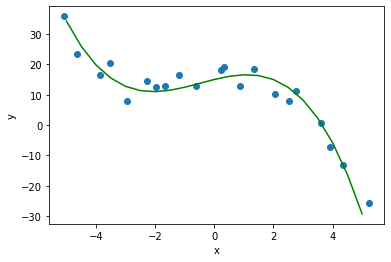

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data[0], data[1])
plt.plot(data0[0], data0[1], "green")

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

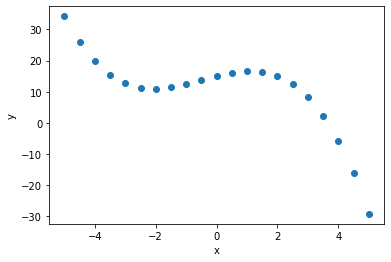

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])

In [ ]:
from scipy import interpolate

- linear splines

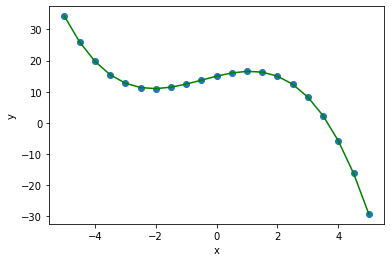

In [ ]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind='linear')

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]), "green")

- zoom

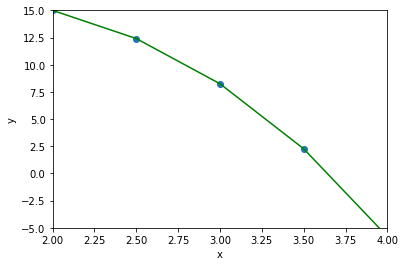

In [ ]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind='linear')

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(2,4)
plt.ylim(-5,15)
plt.scatter(data0[0], data0[1])

xlist = np.linspace(2,4,201)
plt.plot(xlist, splineLinear0(xlist), "green")

-- For Spline Fitting: the approximation of the fitting is good, but it is unphysical as the derivative is constant between 2 points (linear piecewise) 

-- We can solve this problem by using cubic spline

- cubic spline

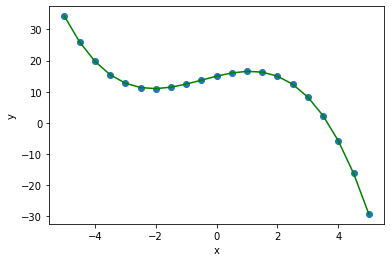

In [ ]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind='cubic')

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineCubic0(data0[0]), "green")

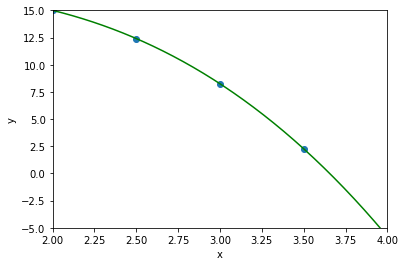

In [ ]:
# Zoom in
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind='cubic')

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(2,4)
plt.ylim(-5,15)
plt.scatter(data0[0], data0[1])

xlist = np.linspace(2,4,201)
plt.plot(xlist, splineCubic0(xlist), "green")

### 2.2.2 Perturbed data

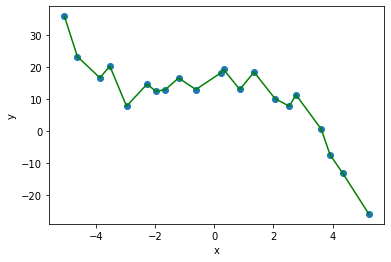

In [ ]:
splineLinear = interpolate.interp1d(data[0], data[1], kind='linear')

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data[0], data[1])
plt.plot(data[0], splineLinear(data[0]), "green")

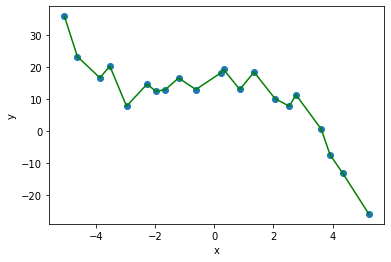

In [ ]:
splineCubic = interpolate.interp1d(data[0], data[1], kind='cubic')

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data[0], data[1])
plt.plot(data[0], splineCubic(data[0]), "green")

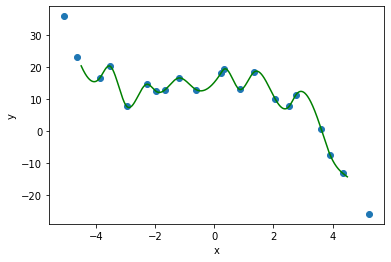

In [ ]:
# For more points
splineCubic = interpolate.interp1d(data[0], data[1], kind='cubic')

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data[0], data[1])

xlist = np.linspace(-4.5, 4.5, 1000)
plt.plot(xlist, splineCubic(xlist), "green")

-- Here with Linear Spline : the fit is un-physical as the derivative is constant for each interval

-- Here with Cubic Spline: the fit is quite over-fitting as it fit noises of the data.

- How to handle data which is not smooth?

- How we decrease the level of noise fitting/ overfitting

A tool of regularlization

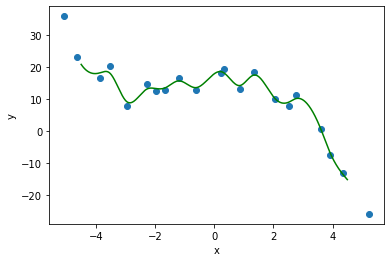

In [ ]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data[0], data[1])

xlist = np.linspace(-4.5, 4.5, 1000)
plt.plot(xlist, splineSmooth(xlist), "green")

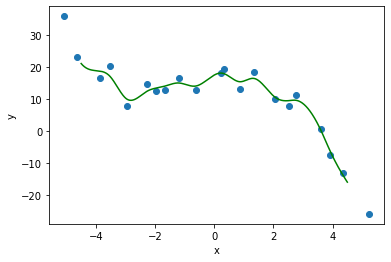

In [ ]:
# Increase regulization level
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(50)
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data[0], data[1])

xlist = np.linspace(-4.5, 4.5, 1000)
plt.plot(xlist, splineSmooth(xlist), "green")

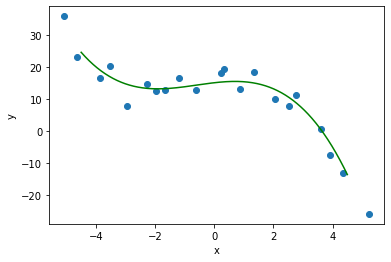

In [ ]:
# Increase regulization level
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(200)
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data[0], data[1])

xlist = np.linspace(-4.5, 4.5, 1000)
plt.plot(xlist, splineSmooth(xlist), "green")

For Spline Method:
- We fit every segment of point with different polynominal functions
- This method could results in overfitting as it fits all noise. The linear spline is physically impossible as the derivative is constant of each segment
- Regularlization terms are introduced to reduce overfitting.

Another idea is to fit the data points with only a single polynominal instead of several for all data points

## Add-on: How you can always fit data with a polynominal

In [ ]:
datapoly = data[:,7:14]    # Get 7 data points from pertubated dataset
datapoly

array([[-1.66122927, -1.20566778, -0.62149475,  0.24078553,  0.31535054,
         0.86281615,  1.34584014],
       [12.91549353, 16.5657244 , 12.97948625, 18.28119582, 19.22624209,
        12.99113902, 18.42189293]])

we have 7 data points - meaning we need a 6th polynominal for the perfect interpolation

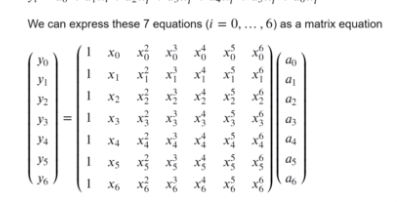

The middle matrix is a matrix of numbers we can calculate to find the slope vector a 

In [ ]:
x = np.array([datapoly[0,:]**0, datapoly[0,:]**1, datapoly[0,:]**2, datapoly[0,:]**3, datapoly[0,:]**4, datapoly[0,:]**5, datapoly[0,:]**6])
x = x.T

In [ ]:
x[:,0] # after transpose, the first column is 1 for each element

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
y = datapoly[1,:]
y

array([12.91549353, 16.5657244 , 12.97948625, 18.28119582, 19.22624209,
       12.99113902, 18.42189293])

In [ ]:
a = np.linalg.solve(x, y)

In [ ]:
a

array([ 14.34662395,  15.94753119,  10.93812579, -34.5796759 ,
       -20.91706137,  14.63247435,   8.60112761])

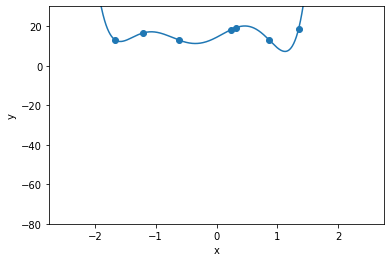

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-80,30])
x_list = np.linspace(-2.5,2.5,901)
y_list = a[0]*x_list**0 + a[1]*x_list + a[2]*x_list**2 + a[3]*x_list**3 + a[4]*x_list**4 + a[5]*x_list**5 + a[6]*x_list**6
plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, y_list)

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

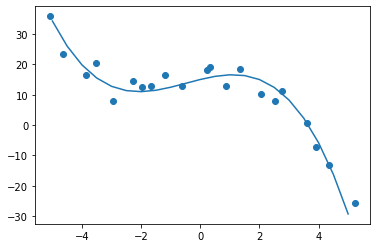

In [ ]:
# We will find the parameters of the function to fit the data points with minimum error
plt.scatter(data[0], data[1])
plt.plot(data0[0], data0[1])

In [ ]:
def polynominalModel(x, a):
  # x: argument of points 
  # a: the parameters of model
  t = 0
  for k in range(len(a)):
    t = t + a[k] * x**k
  return t

In [ ]:
# Let's try with the true function parameters
a0 = np.array([15, 2.4, -0.5, -0.35])

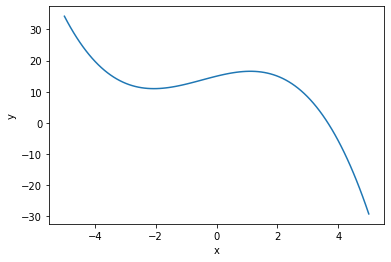

In [ ]:
plt.xlabel("x")
plt.ylabel("y")

x_list = np.linspace(-5,5, 100)
plt.plot(x_list, polynominalModel(x_list, a0))

In [ ]:
polynominalModel(x=np.array([1,2,3]), a=a0)

array([16.55, 15.  ,  8.25])

The function will get x and a set of a, then output the value of y.
If we input x as a list, it will about the list of y based on the function parameters.
Out task is to find out a set of a that would output a set of y prediction for abs(y prediction - y true) is minimum

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

In [ ]:
def errorFit(f, coefficients, data):
  # f: fit function
  # coeff: ai to optimize (same as ai)
  # data: data we fit
  error = 0
  for i in range(len(data[0])):
    error = error + (data[1, i] - f(data[0, i], coefficients))**2
    #print(error)
  return error

In [ ]:
errorFit(polynominalModel, a0, data)

299.56218720120097

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

In [ ]:
def errorFitGradient(f, coefficients, data):
   # f: fit function
   # coeff: ai to optimize (same as ai)
   # data: data we fit
   return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients))*data[0,i]**k for i in range(len(data[0]))]))
       for k in range(len(coefficients))])

In [ ]:
errorFitGradient(polynominalModel, a0, data)

array([  -15.5446857 ,   -58.93010598,  -232.20906645, -3076.62754027])

In [ ]:
def errorFitGradientLooping(f, coefficients, data):
  gradients = []
  for k in range(len(coefficients)):
    gradient_k = 0
    for i in range(len(data[0])):
      gradient_k = gradient_k + (-2)*(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k

    gradients.append(gradient_k)
  
  return np.array(gradients)

In [ ]:
errorFitGradientLooping(polynominalModel, a0, data)

array([  -15.5446857 ,   -58.93010598,  -232.20906645, -3076.62754027])

### 2.3.4 Loop for the actual fitting

In [ ]:
# Start with the random coefficients
iterations = 100000
h = 0.00001
a = 2*np.random.rand(4)-1

print(a)
for i in range(iterations):
  a = a - h * errorFitGradientLooping(polynominalModel, a, data)   # Go the opposite of the gradient

print(a)

[ 0.06060048 -0.05053454  0.15440605  0.46888038]
[15.09045664  1.0448205  -0.47262172 -0.26075062]


- Comparison of a and a0

In [ ]:
print(a)
print(a0)

[15.09045664  1.0448205  -0.47262172 -0.26075062]
[15.    2.4  -0.5  -0.35]


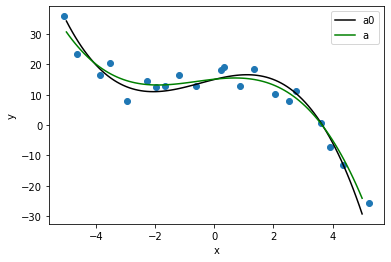

In [ ]:
plt.xlabel("x")
plt.ylabel("y")

x_list = np.linspace(-5,5,100)
plt.plot(x_list, polynominalModel(x_list, a0), "black", label="a0")
plt.scatter(data[0], data[1])
plt.plot(x_list, polynominalModel(x_list, a), "green", label="a")
plt.legend()

In [ ]:
errorFit(polynominalModel, a, data)

198.31726931503303

In [ ]:
errorFit(polynominalModel, a0, data)

299.56218720120097

The new fit actually outperformed the original function

## Put it all together

### Generate data points and noise

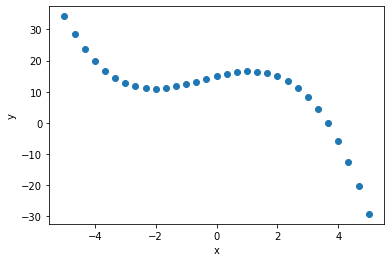

In [ ]:
def correctFunction(x):
  return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3


npoints = 31
xlist = np.linspace(-5,5,npoints)
data0 = np.array([xlist, correctFunction(xlist)])

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])

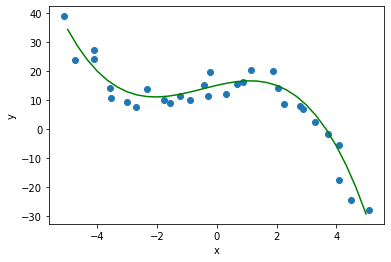

In [ ]:
# Shift x by +- 0.25 and y by +- 5.0
data = np.array([data0[0] + (2*np.random.rand(npoints) -1) * 0.25, data0[1] + (2*np.random.rand(npoints) -1) * 5])

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data[0], data[1])
plt.plot(data0[0], data0[1], "green")

### Fitting function

In [ ]:
# Let's try with the true function parameters
a0 = np.array([15, 2.4, -0.5, -0.35])
data0
data

array([[ -5.10852754,  -4.74061982,  -4.12345914,  -4.12586051,
         -3.57891313,  -3.55474745,  -3.00198395,  -2.69527249,
         -2.32924959,  -1.75536911,  -1.57249729,  -1.24254066,
         -0.9066762 ,  -0.44208102,  -0.29308299,  -0.21609233,
          0.32110352,   0.66821857,   0.89084811,   1.14843358,
          1.86879442,   2.05678685,   2.25170478,   2.77733713,
          2.87811713,   3.30376379,   3.71542289,   4.08894087,
          4.09031097,   4.47952531,   5.09179617],
       [ 38.77554969,  23.70599409,  27.1304855 ,  24.18384386,
         14.06638164,  10.69849432,   9.42952353,   7.69945667,
         13.62063637,  10.04249508,   8.98738891,  11.16158752,
          9.91111604,  15.10462332,  11.49645456,  19.69747314,
         11.94503675,  15.61420288,  16.31396324,  20.44498258,
         20.02416242,  14.08633595,   8.50496557,   7.9805125 ,
          6.81354501,   2.28136884,  -1.65447746,  -5.66136026,
        -17.44943173, -24.49231902, -27.85185099]])

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

In [ ]:
################################## The model function that take input of x point and coefficient a - then output y #####################3333
def polynominalModel(x, a):
  # x: argument of points 
  # a: the parameters of model
  t = 0
  for k in range(len(a)):
    t = t + a[k] * x**k
  return t


################################## The error function that gives the residual of actual y value and prediction from the f function with coefficient a
def errorFit(f, coefficients, data):
  # f: fit function
  # coeff: ai to optimize (same as ai)
  # data: data we fit
  error = 0
  for i in range(len(data[0])):
    error = error + (data[1, i] - f(data[0, i], coefficients))**2
    #print(error)
  return error


################################ Gradient function output the vector of gradient 
def errorFitGradientLooping(f, coefficients, data):
  gradients = []
  for k in range(len(coefficients)):
    gradient_k = 0
    for i in range(len(data[0])):
      gradient_k = gradient_k + (-2)*(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k

    gradients.append(gradient_k)
  
  return np.array(gradients)


def errorFitGradient(f, coefficients, data):
   # f: fit function
   # coeff: ai to optimize (same as ai)
   # data: data we fit
   return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients))*data[0,i]**k for i in range(len(data[0]))]))
       for k in range(len(coefficients))])
  

Let's try to fit with the 5th polynominal instead of 4th polynominal

In [ ]:
# Start with the random coefficients
iterations = 10000
h = 0.00001
a = 2*np.random.rand(4)-1

print(a)
for i in range(iterations):
  a = a - h * errorFitGradient(polynominalModel, a, data)   # Go the opposite of the gradient

print(a)

[-0.81295201  0.9324127   0.3428279  -0.40851723]
[13.32639073  2.34381937 -0.4792766  -0.35814667]


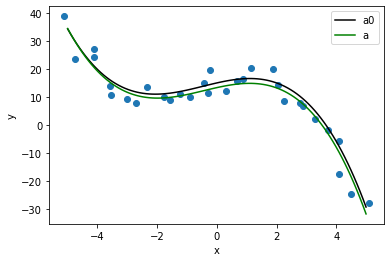

In [ ]:
plt.xlabel("x")
plt.ylabel("y")

x_list = np.linspace(-5,5,100)
plt.plot(x_list, polynominalModel(x_list, a0), "black", label="a0")
plt.scatter(data[0], data[1])
plt.plot(x_list, polynominalModel(x_list, a), "green", label="a")
plt.legend()

In [ ]:
a

array([13.32639073,  2.34381937, -0.4792766 , -0.35814667])

In [ ]:
a0

array([15.  ,  2.4 , -0.5 , -0.35])

In [ ]:
errorFit(polynominalModel, a, data), errorFit(polynominalModel, a0, data)

(460.70359706039187, 497.28207012114433)